# Python notebook to reproduce _Supplementary Figure 5_

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_5/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [3]:
df = pd.read_csv('results/LINCS/processed_dataset_statistics.csv')

In [4]:
broad_drugs = df['drug_id'].tolist()
cell_lines = df['cell_id'].tolist()

# Code to reproduce Supplementary figure 5a-b

Supplementary Fig. 5a

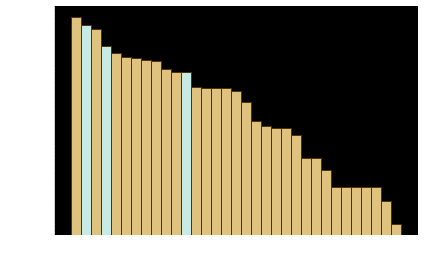

In [11]:
%matplotlib inline

cell_line_counts = {cl: len([x for x in cell_lines if x == cl]) for cl in np.unique(cell_lines)}
sorted_cls = sorted(list(cell_line_counts.keys()), key=lambda cl: -cell_line_counts[cl])

ax = plot_settings.get_wider_axis()

bcolor = plot_settings.get_sag_vs_baseline_colors('baseline')
emph_color = plot_settings.get_sag_vs_baseline_colors('Sagittarius')
ecolor = plot_settings.get_model_colors('cvae')

plot_utils.sorted_histogram(
    ax, cell_lines, sorted_cls, 'Cell line', 'Count in LINCS dataset',
    call_out_labels=['A549', 'PC3', 'SKBR3'], base_color=bcolor, call_out_color=emph_color,
    edge_color=ecolor, yscale='log', anchor='center')
plot_utils.format_ax(ax)
plt.tight_layout()
plt.savefig(fig_dir + 'figure_5a.pdf')

Supplementary Fig. 5b

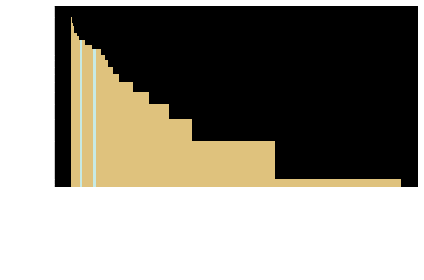

In [10]:
extra_drug_translator = {
    'BRD-K85606544': 'Neratinib', 'BRD-K92428232': 'GSK-461364'}

drug_counts = {dr: len([x for x in broad_drugs if x is not None and x.upper() == dr.upper()]) 
               for dr in set(broad_drugs) if dr is not None}
sorted_drgs = sorted(list(drug_counts.keys()), key=lambda dr: -drug_counts[dr])

ax = plot_settings.get_wider_axis()
plot_utils.sorted_histogram(
    ax, [dr for dr in broad_drugs if dr is not None], sorted_drgs, 'Drug', 
    'Count in LINCS dataset', base_color=bcolor,
    call_out_labels=['BRD-K85606544', 'BRD-K92428232'],
    call_out_color=emph_color, rotangle=-45, anchor='left', add_padding=2, edge_color=None,
    edge_width=0.0, yscale='log', extra_name_translation=extra_drug_translator)
plot_utils.format_ax(ax)
plt.tight_layout()
plt.savefig(fig_dir + 'figure_5b.pdf')